In [1]:
#Inicializamos una cadena de Markov

import numpy as np

# Estado 0: 0.1 probabilidad
# Estado 1: 0.8 probabilidad
# Estado 2: 0.1 probabilidad

p_init = np.array([0.1, 0.8, 0.1])

In [2]:
#Inicializamos la matriz de transición

p_transicion = np.array(
    [[0.90, 0.05, 0.05],
     [0.01, 0.90, 0.09],
     [0.07, 0.03, 0.9]]
)
p_transicion

array([[0.9 , 0.05, 0.05],
       [0.01, 0.9 , 0.09],
       [0.07, 0.03, 0.9 ]])

In [3]:
#Solo para confirmar que cada fila suma uno:

assert p_transicion[0, :].sum() == 1
assert p_transicion[1, :].sum() == 1
assert p_transicion[2, :].sum() == 1

In [4]:
#Distribución de equilibrio

p_transicion_ejemplo = np.array(
    [[0.6,  0.2, 0.2],
     [0.05, 0.9, 0.05],
     [0.1,  0.2, 0.7]]
)

In [5]:
#Para simular la distribución de estados en el siguiente paso de tiempo:

p_next = p_init @ p_transicion_ejemplo
p_next

array([0.11, 0.76, 0.13])

In [6]:
#Podemos hacerlo de nuevo para simular la distribución de estados en el siguiente paso de tiempo:

p_next = p_next @ p_transicion_ejemplo
p_next

array([0.117, 0.732, 0.151])

In [7]:
#Ahora escribamos un ciclo for para automatizar el proceso:

p_state_t = [p_init]

for i in range(200):  # 200 time steps sorta, kinda, approximates infinite time :)
    p_state_t.append(p_state_t[-1] @ p_transicion_ejemplo)

In [8]:
#Hagamos la lista p_state_t en un DataFrame de pandas:

import pandas as pd

state_distributions = pd.DataFrame(p_state_t)
state_distributions

,0,1,2
0,0.100000,0.800000,0.10000
1,0.110000,0.760000,0.13000
2,0.117000,0.732000,0.15100
3,0.121900,0.712400,0.16570
4,0.125330,0.698680,0.17599
...,...,...,...
196,0.133333,0.666667,0.20000
197,0.133333,0.666667,0.20000
198,0.133333,0.666667,0.20000
199,0.133333,0.666667,0.20000


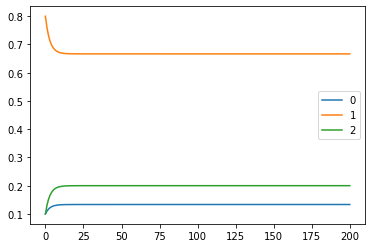

In [9]:
#Ahora, grafiquemos cómo se ven las distribuciones:

import matplotlib.pyplot as plt
state_distributions.plot();